<a href="https://colab.research.google.com/github/johnkarani254/Diabetes-deployment/blob/master/DIABETES_PREDICTION_using_LOGISTIC_ALGORITHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES PREDICTION USING LOGISTIC REGRESSION ALGORITHM**

**General Objectives**

To develop a deep learning model that leverages data science techniques to predict the early onset of
diabetes.

**Specific objectives**
i. To evaluate the performance of the model using metrics such as accuracy and precision.
ii. To identify trends and patterns of diabetes types and how it evolves in different stages and its
effects.
iii. To develop a predictive model that analyzes user data to give insights and make prediction.
iv. To create visualization to show prediction results of early diabetes using charts as time series
graphs that shows the predicted vs actual glucose levels over time\

**importing libraries**

Data handling:Pandas,numpy,matplotlib,seaborn,warnings,filterwarnings('ignore').

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



READ THE DATASET

In [ ]:
df=pd.read_csv('/content/diabetes1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


look for shape,size,nulll values,duplicates,descriprive statistics

In [ ]:
df.shape

(768, 9)

In [ ]:
df.size

6912

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**VIZUALIZATION**

Text(0, 0.5, 'BloodPressure')

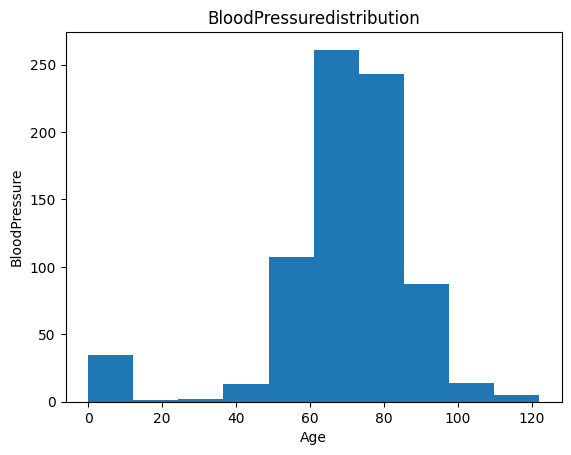

In [ ]:
plt.hist(df["BloodPressure"])
plt.title("BloodPressuredistribution" )
plt.xlabel("Age")
plt.ylabel('BloodPressure')

DISTRIBUTION IS RIGHT SKEWED
This shows that people between ages 60 to 80 have a higher blood pressure

WHAT NO SHOWS DIABETES

<Axes: xlabel='Outcome', ylabel='count'>

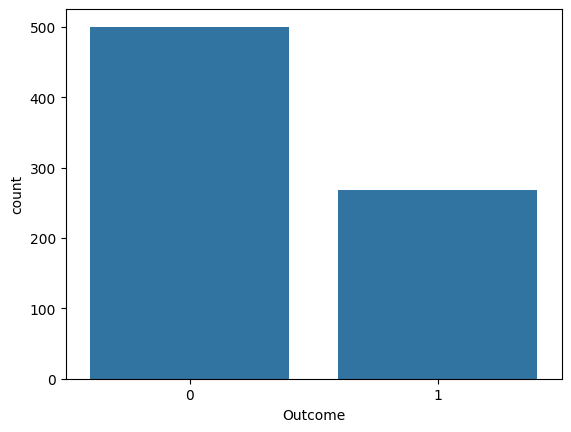

In [ ]:
sns.countplot(x = 'Outcome',data = df)

INSIGHTS Simce 0 represents patients being non diabetic  and 1 represents patient who are diabetic this shows that most patients are non diabetic

how  pregnancy,glucose level,Blood pressure,Skin thickness,Insulin,BMI,Age,Diabetes Pedigree function levels contribute to the  final outcome of patient  to either being non diabetic or diabetic?


CONFUSION MATRIX TO SHOW CORRELATION

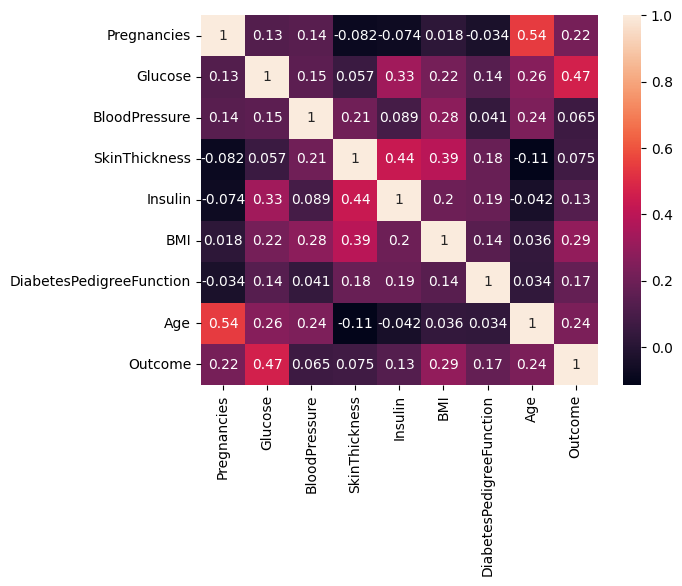

In [ ]:
# Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

INSIGHTS:
There is a high corelation between glucose level and outcome

PROCESSING DATA

In [ ]:
# Replacing zero values with NaN values
dataset_new = df
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


LOGISTICS REGRESSION

logistic regression is a binary classification with  dependent variable where outcome is either 0 or 1.And independent variable has categorical and continous varible.it is very interpretable .




In [ ]:
y = dataset_new['Outcome']
X = dataset_new.drop('Outcome', axis=1)

In [ ]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.02, random_state = 42, stratify = dataset_new['Outcome'] )

our target is variable is outcome

FIT THE MODEL AFTER SPLIITING 80/20

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)

Target variable/outcome

In [ ]:
y_predict

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

80/20 RULE

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predict)
cm

array([[9, 1],
       [2, 4]])

<Axes: >

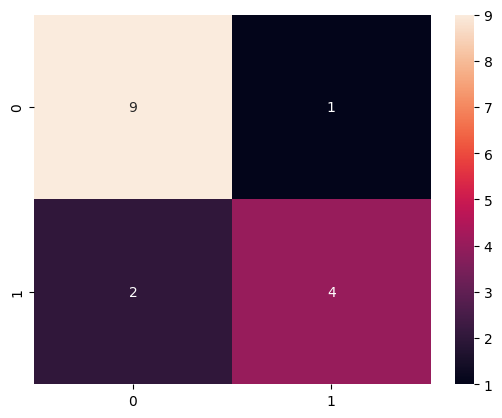

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:

accuracy =accuracy_score(Y_test, y_predict)
accuracy

0.8125

THE model is accurate since  0.8 is near 1 hence accurate

**CHECK IF PATIENT IS DIABETIC**